# Instrucciones
Elabore esta tarea en una notebook independiente, registrando sus resultados o las salidas de
los programas. En todos los casos en que sea posible, resuelva los problemas mediante
simulación y después verifique los resultados con las fórmulas correspondientes.

# **1. En la biblioteca**
**Un encargado de la biblioteca es el único en el mostrador durante todo su turno de trabajo.
Las llegadas al mostrador siguen una distribución de Poisson con una media de 8 por hora.
Cada usuario de la biblioteca es atendido de uno en uno, y el tiempo de servicio sigue una
distribución exponencial con una media de 5 minutos.**

 * a) ¿Cuál es la probabilidad de que se forme cola?
 * b) ¿Cuál es la longitud media de la cola?
 * c) ¿Cuál es el tiempo medio que un cliente pasa en la biblioteca hasta que le han
atendido?
 * d) ¿Cuál es el tiempo medio que un cliente pasa en la cola esperando a que le atiendan?
 * e) El encargado de la biblioteca pasa su tiempo en que no hay clientes clasificando artículos
de revistas. Si puede clasificar 22 fichas por hora como media cuando trabaja continuamente,
¿cuántas fichas puede ordenar durante su trabajo?

     0.000 1
    12.897 2
    21.430 3
    26.689 4
    27.995 5
                 29.159 4
    30.764 5
    43.278 6
    43.437 7
    55.297 8
    61.191 9
    63.436 10
    69.970 11
                 72.321 10
    92.222 11
                 92.376 10
   110.025 11
                116.952 10
                119.000 9
   120.392 10
   133.469 11
   134.597 12
                137.400 11
   152.974 12
   174.400 13
   182.364 14
   191.583 15
   208.236 16
   217.546 17
                220.157 16
   228.356 17
   228.552 18
   236.458 19
   237.244 20
   241.822 21
                243.930 20
   256.265 21
   264.189 22
   268.307 23
   278.947 24
                280.740 23
   286.424 24
   287.840 25
                297.531 24
   298.024 25
                298.228 24
   299.378 25
   301.863 26
                304.488 25
   305.456 26
   308.627 27
   318.241 28
   318.715 29
   325.885 30
                331.300 29
                339.262 28
   347.859 29
   355.691 30
   360.518 31
   3

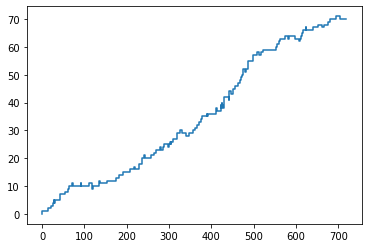

La probabilidad de que se forme una cola es :  0.9923664122137404
Esta es la lista de las peronas en fila 
[2, 3, 4, 5, 4, 5, 6, 7, 8, 9, 10, 11, 10, 11, 10, 11, 10, 9, 10, 11, 12, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 19, 20, 21, 20, 21, 22, 23, 24, 23, 24, 25, 24, 25, 24, 25, 26, 25, 26, 27, 28, 29, 30, 29, 28, 29, 30, 31, 32, 33, 34, 35, 36, 35, 36, 37, 38, 37, 38, 39, 38, 39, 40, 39, 38, 39, 40, 41, 42, 41, 42, 43, 44, 43, 44, 45, 46, 47, 48, 49, 48, 49, 50, 51, 52, 51, 52, 53, 54, 55, 56, 57, 58, 57, 58, 59, 60, 61, 62, 63, 64, 63, 64, 63, 62, 63, 64, 65, 66, 67, 66, 67, 68, 67, 68, 69, 70, 71, 70, 71]
La longitud media de la cola es:  36.207692307692305


In [ ]:
"""
Created on Mon Apr 07 10:57:14 2022

@author: Osval
"""

#simulación de eventos discretos 

#SIMULAR UNA LINEA DE ESPERA CON UN SERVIDOR 

#con parametros:
    #Los clientes llegan con siguiendo un proceso de Poisson
    #Los tiempos de antención en el sevidor siguen una distribución Exponencial
from random import random 
from math import log
import matplotlib.pyplot as plt
T=720 #tiempo de simulación 12 hrs
l_l=8/60 #parametro lambda, llega un usario por hora
l_s=0.05 #clientes por hora que puede atender el servidor
t=0 #tiempo de reloj inicial
infi=100000000
ts=infi #tiempo de ocurrencia de la proxima salida
tl=0    #tiempo de ocurrencia de la proxima llegada
l=0
lx=[]
ly=[]
lp=[]
lp1=[]
lp2=[]
lc=[]
while min(tl,ts)<T:
    ta=t
    t=min(tl,ts)
    lx.append(ta)
    ly.append(l)
    lx.append(t)
    ly.append(l)
    if t==tl: #es una llegada
        l=l+1 #si es una llegada iteramos el número de personas en el sistema
        print("%10.3f"%tl,l) #imprimimos el tiempo actual y el numero de personas en el sistema
        tl=t-(1/l_l)*log(random()) #generamos el proximo tiemp de llegada por el metodo de la inversa
        if l==1:
          ts=t-(1/l_s)*log(random()) #generando una exponencial (metodo de la inversa)
          lp1.append(1)
        elif l==0:   #generamos este elif para ir contando el total de eventos y sacar asi la probabilidad
          lp2.append(1)
        else:       #generamos este else para ir guardando a las personas en la fila
          lp.append(1)
          lc.append(l)
    else:     #es una salida
        l=l-1
        print("            ","%10.3f"%ts,l)
        if l==0:
            ts=infi
            lp2.append(1)
        else:
            ts=t-(1./l_s)*log(random())
            if l==1:
              lp1.append(1)
            else:
              lp.append(1)
              lc.append(l)   
plt.plot(lx,ly)
plt.show()
lpt=len(lp1)+len(lp)+len(lp2)
print("La probabilidad de que se forme una cola es : ",sum(lp)/lpt)
print("Esta es la lista de las peronas en fila ")
print(lc)
pr=sum(lc)/len(lc)
print("La longitud media de la cola es: ",pr)
#Los eventos a la izquierda son llegadas y a la derecha son salidas

# **2. Lavado de autos**
**Un pequeño autoservicio de lavado que solo tienen capacidad para atender de uno en uno a
los autos que llegan, tiene un aparcamiento para 10 coches, incluyendo el que está siendo
lavado. La empresa ha estimado que los coches llegan siguiendo una distribución de Poisson
con una media de 20 coches/hora, el tiempo de servicio sigue una distribución exponencial**
de 12 minutos. La empresa abre durante 10 horas al día.

¿Cuál es la media de coches perdidos cada día debido a las limitaciones de espacio?

In [ ]:
"""
Created on Mon Apr 07 12:57:14 2022

@author: Osval
"""

#simulación de eventos discretos 

#SIMULAR UNA LINEA DE ESPERA CON UN SERVIDOR 

#con parametros:
    #Los clientes llegan con siguiendo un proceso de Poisson
    #Los tiempos de antención en el sevidor siguen una distribución Exponencial
from random import random 
from math import log
import matplotlib.pyplot as plt
T=600 #tiempo de simulación
l_l=20/60 #parametro lambda, llega un carro por minuto
l_s=0.12 #clientes por minuto que puede atender el servidor
t=0 #tiempo de reloj inicial
infi=100000000
ts=infi #tiempo de ocurrencia de la proxima salida
tl=0    #tiempo de ocurrencia de la proxima llegada
l=0
ly=[]

while min(tl,ts)<T:
    ta=t
    t=min(tl,ts)
    ly.append(l)
    if t==tl: #es una llegada
        l=l+1
        #print("%10.3f"%tl,l)
        tl=t-(1/l_l)*log(random())
        if l==1:
            ts=t-(1/l_s)*log(random()) #generando una exponencial (metodo de la inversa)
    else:     #es una salida
        l=l-1
        #print("            ","%10.3f"%ts,l)
        if l==0:
            ts=infi
        else:
            ts=t-(1./l_s)*log(random())
          
   
q=len(ly)-1
q1=ly[q]-10
print("Carros no atendidos en un dia: ",q1)

Carros no atendidos en un dia:  118


Ahora creamos una función para poder iterarlo n número de veces\
En este caso van a ser 50 veces


In [ ]:
lt=[]
for i in range(50):
  T=600 #tiempo de simulación
  l_l=20/60 #parametro lambda, llega un carro por minuto
  l_s=0.12 #clientes por minuto que puede atender el servidor
  t=0 #tiempo de reloj inicial
  infi=100000000
  ts=infi #tiempo de ocurrencia de la proxima salida
  tl=0    #tiempo de ocurrencia de la proxima llegada
  l=0
  ly=[]

  while min(tl,ts)<T:
      ta=t
      t=min(tl,ts)
      ly.append(l)
      if t==tl: #es una llegada
          l=l+1
          #print("%10.3f"%tl,l)
          tl=t-(1/l_l)*log(random())
          if l==1:
              ts=t-(1/l_s)*log(random()) #generando una exponencial (metodo de la inversa)
      else:     #es una salida
          l=l-1
          #print("            ","%10.3f"%ts,l)
          if l==0:
              ts=infi
          else:
             ts=t-(1./l_s)*log(random()) 
  q=len(ly)-1
  q1=ly[q]-10
  lt.append(q1)
print(lt)
tol= sum(lt)/len(lt)
print("La media de coches perdidos cada día debido a las limitaciones de espacio es: ",tol)



[105, 98, 105, 109, 145, 143, 144, 152, 123, 118, 126, 122, 90, 92, 137, 108, 133, 148, 118, 116, 121, 107, 133, 149, 128, 111, 141, 119, 123, 130, 124, 118, 121, 110, 97, 131, 109, 97, 121, 141, 106, 110, 106, 126, 86, 137, 124, 94, 84, 126]
La media de coches perdidos cada día debido a las limitaciones de espacio es:  119.24


# **3. John Macko**
**John Macko es alumno en la U de Ozark. Hace trabajos extraños para aumentar sus ingresos.
Las peticiones de trabajo llegan en promedio cada 5 días, pero el tiempo entre ellas es
exponencial. El tiempo para terminar un trabajo también es exponencial, con una media de 4
días.**

 * a) ¿Cuál es la probabilidad de que le falte trabajo a John?
 * b) Si John cobra unos 50 por cada trabajo, ¿cuál es su ingreso mensual promedio?
 * c) Si al final del semestre John decide subcontratar los trabajos pendientes a $40 cada uno,
¿cuánto debe esperar pagar en promedio?